**Explanation of Code and Output:**

**Load and Display Images:** Loads all JPEG images and displays them horizontally.

**Preprocessing:** Clips and normalizes image intensities and displays preprocessed images.

**Segmentation:** Segments lungs using intensity thresholding and displays binary masks.

**Contour Detection:** Finds and plots contours on each preprocessed image.

**Area Calculation:** Computes and displays the area of the segmented lungs for each image.

In [ ]:
pip install numpy matplotlib nibabel scikit-image


In [ ]:
!pip install numpy matplotlib pillow

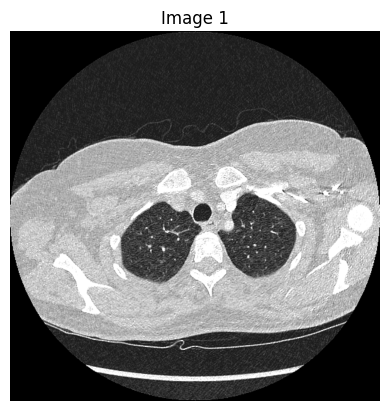

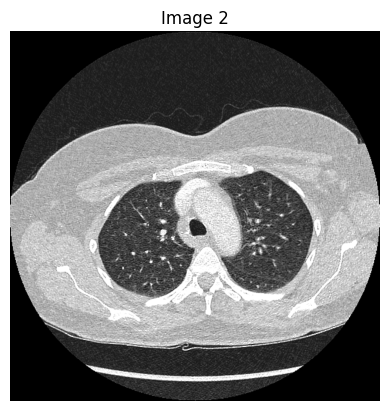

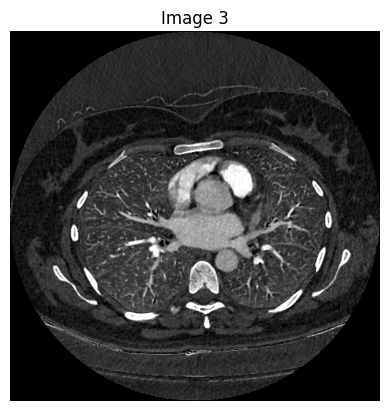

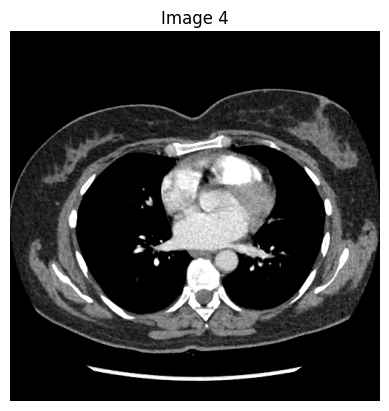

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Specify the folder containing your JPEG images
image_folder = '/content/images'  # Replace with your folder path

# Function to load all JPEG images in the folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg') or filename.endswith('.jpeg'):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img_array = np.array(img)
            images.append(img_array)
    return images

# Load images from the specified folder
images = load_images_from_folder(image_folder)

# Display the middle slice of each image
for i, img in enumerate(images):
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(f'Image {i+1}')
    plt.axis('off')
    plt.show()


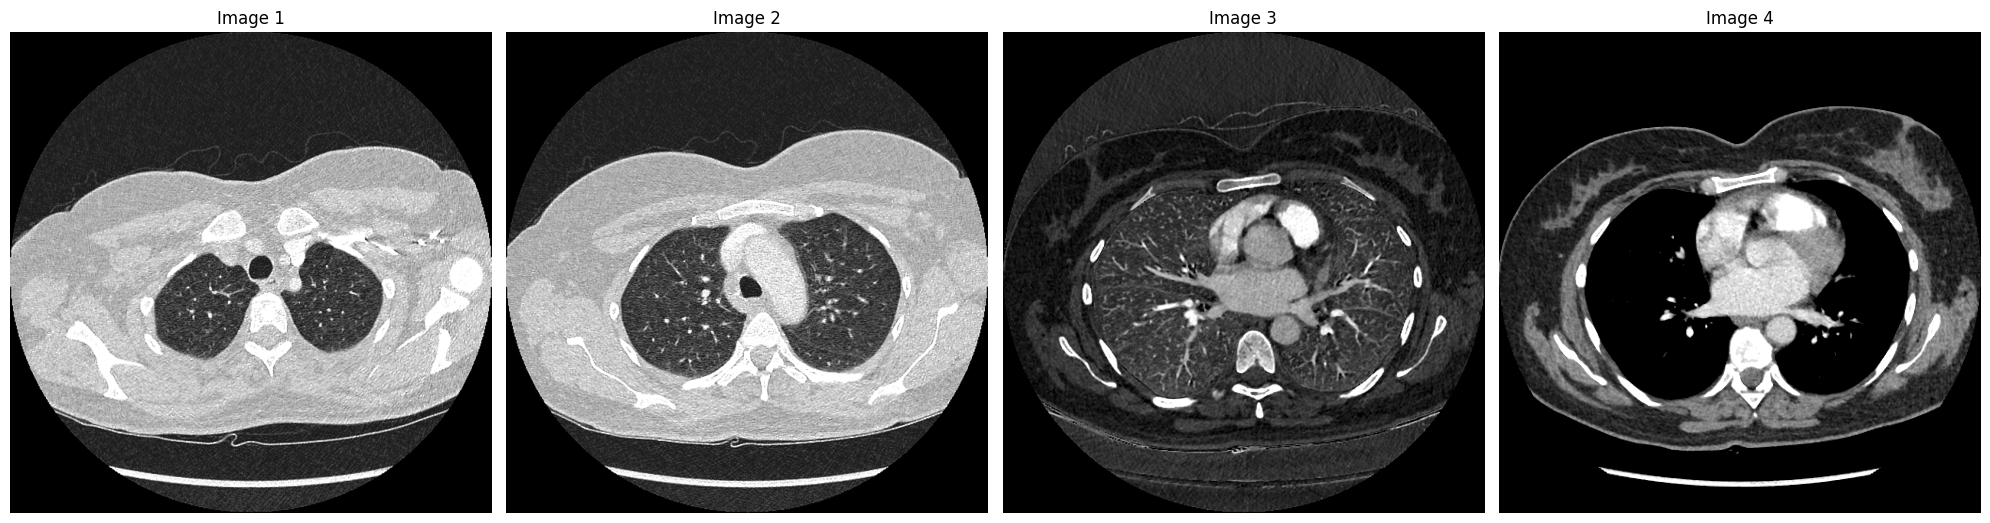

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Specify the folder containing your JPEG images
image_folder = '/content/images'  # Replace with your folder path

# Function to load all JPEG images in the folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg') or filename.endswith('.jpeg'):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img_array = np.array(img)
            images.append(img_array)
    return images

# Load images from the specified folder
images = load_images_from_folder(image_folder)

# Display images horizontally
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
n_images = len(images)
for i, img in enumerate(images):
    plt.subplot(1, n_images, i + 1)  # 1 row, n_images columns
    plt.imshow(img, cmap='gray')
    plt.title(f'Image {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


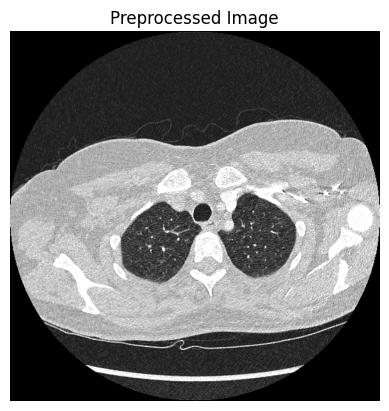

In [ ]:
def preprocess_image(image, min_intensity=0, max_intensity=255):
    """
    Clip the intensity values of the image to the specified range and normalize.
    """
    # Clip the image intensities
    image = np.clip(image, min_intensity, max_intensity)
    # Normalize the image to range [0, 1]
    image = (image - min_intensity) / (max_intensity - min_intensity)
    return image

# Preprocess each image
preprocessed_images = [preprocess_image(img) for img in images]

# Display a preprocessed image as an example
plt.imshow(preprocessed_images[0], cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()


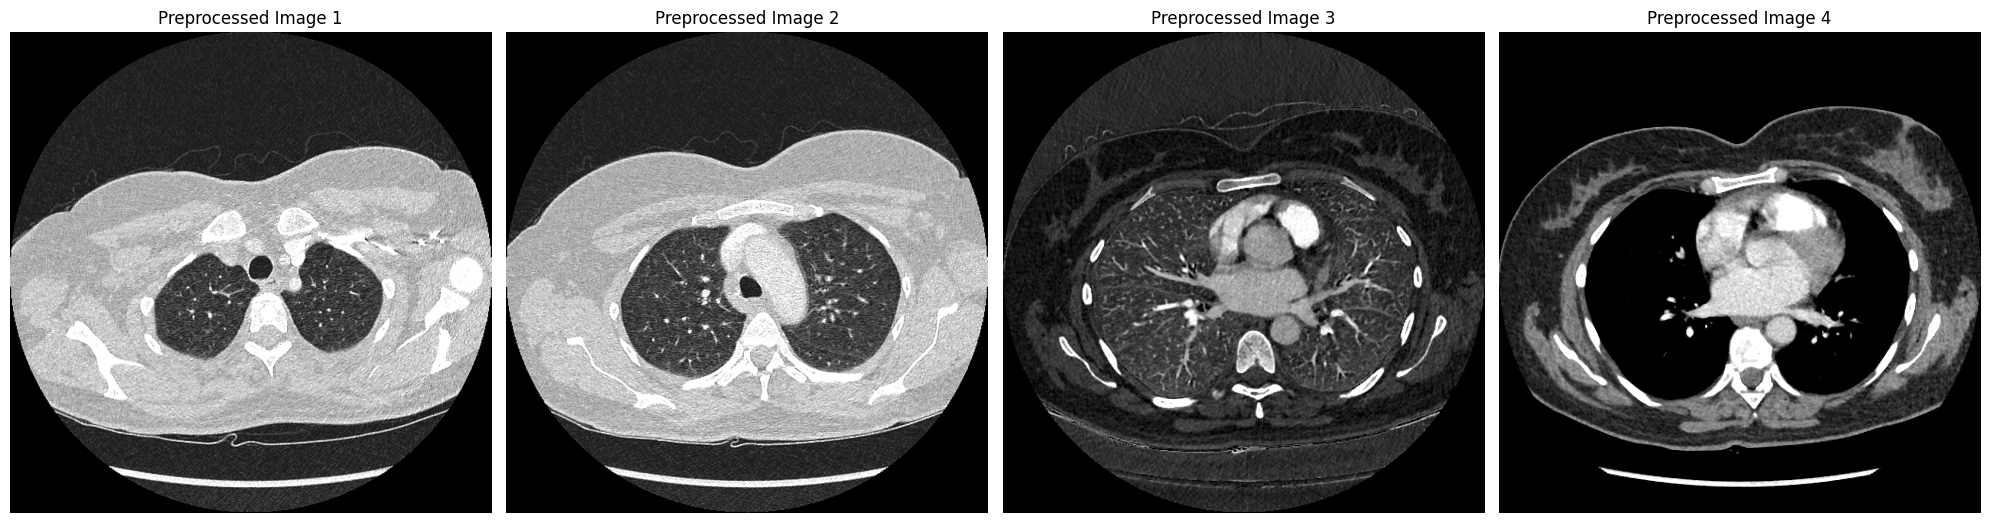

In [ ]:
# Preprocess each image
preprocessed_images = [preprocess_image(img) for img in images]

# Display preprocessed images horizontally
plt.figure(figsize=(20, 10))
for i, img in enumerate(preprocessed_images):
    plt.subplot(1, n_images, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Preprocessed Image {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Step 4: Segment the Lungs Using Intensity Thresholding
def segment_lungs(image, threshold=0.4):
    """
    Segment the lungs using intensity thresholding.
    """
    # Create a binary mask based on the threshold
    binary_image = image < threshold
    return binary_image


In [ ]:
# Segment the lungs for each preprocessed image
lung_masks = [segment_lungs(img) for img in preprocessed_images]

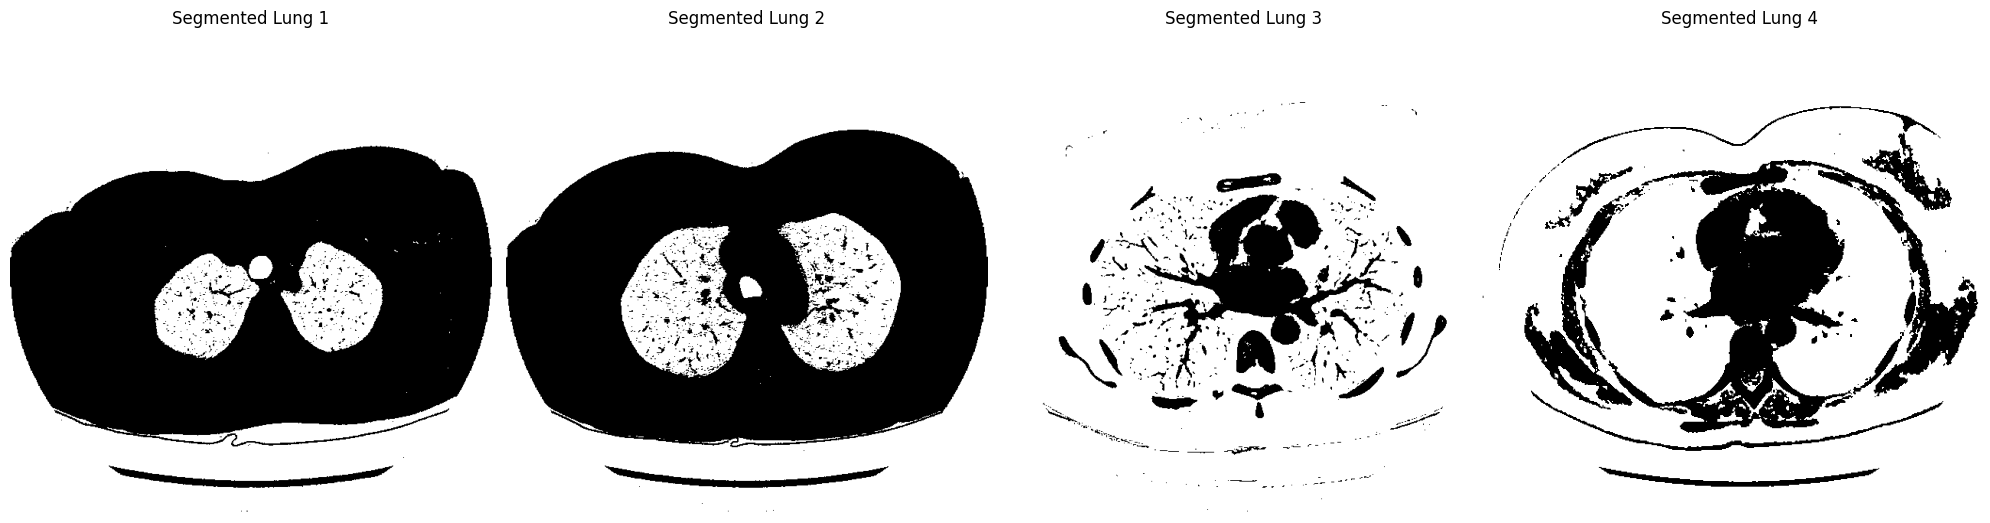

In [ ]:
# Display segmented lung masks horizontally
plt.figure(figsize=(20, 10))
for i, mask in enumerate(lung_masks):
    plt.subplot(1, n_images, i + 1)
    plt.imshow(mask, cmap='gray')
    plt.title(f'Segmented Lung {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Step 5: Find Contours of the Segmented Lungs
def find_lung_contours(binary_image):
    """
    Find contours in the binary lung mask.
    """
    contours = find_contours(binary_image, 0.5)
    return contours

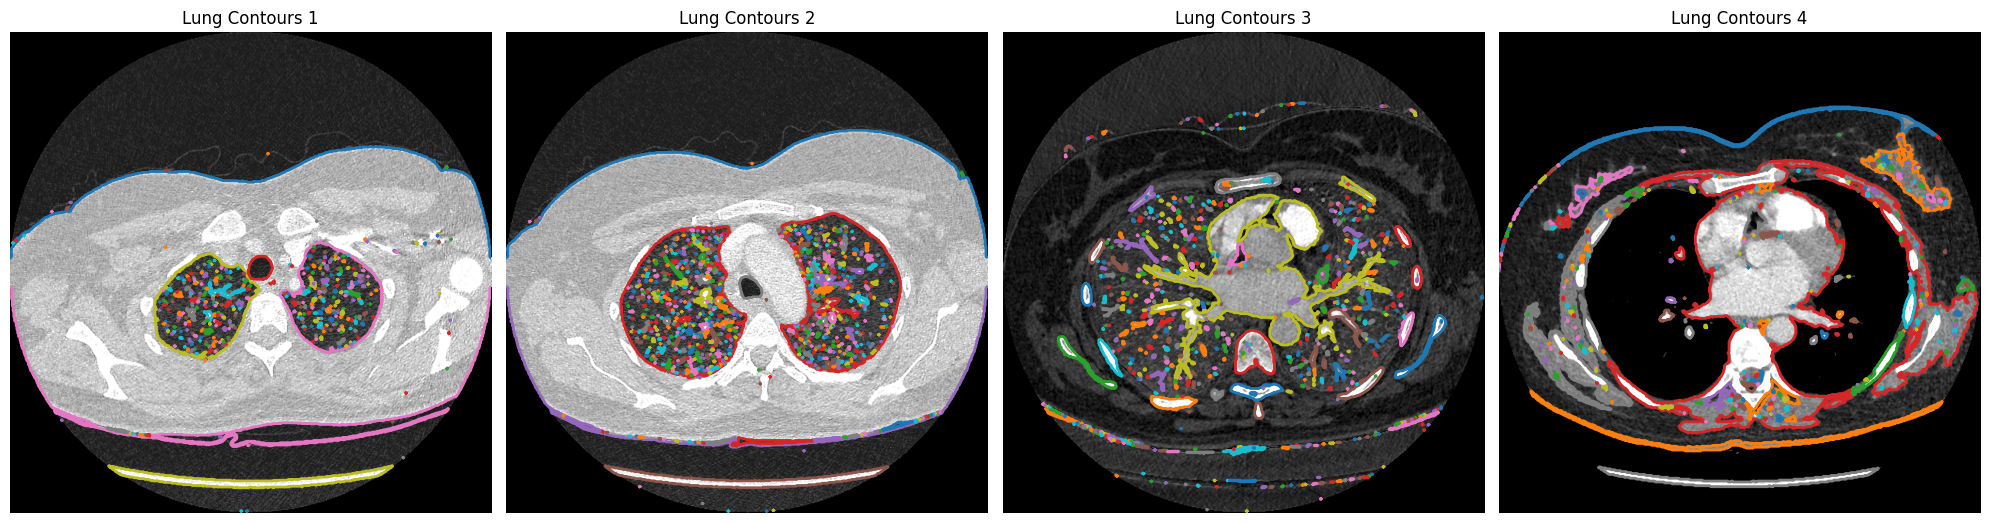

In [ ]:
# Find contours for each lung mask and display
plt.figure(figsize=(20, 10))
for i, (img, mask) in enumerate(zip(preprocessed_images, lung_masks)):
    contours = find_lung_contours(mask)
    plt.subplot(1, n_images, i + 1)
    plt.imshow(img, cmap='gray')
    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    plt.title(f'Lung Contours {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Step 6: Calculate the Area of the Lungs
def calculate_lung_area(binary_image, pixel_spacing=(0.7, 0.7)):
    """
    Calculate the area of segmented lungs.
    """
    lung_area = np.sum(binary_image) * np.prod(pixel_spacing)  # Area in mm²
    return lung_area

# Calculate lung area for each lung mask
lung_areas = [calculate_lung_area(mask) for mask in lung_masks]

# Display the lung area for each image
for i, area in enumerate(lung_areas):
    print(f'Lung Area for Image {i + 1}: {area:.2f} mm²')

Lung Area for Image 1: 108820.67 mm²
Lung Area for Image 2: 108229.24 mm²
Lung Area for Image 3: 176681.75 mm²
Lung Area for Image 4: 103562.97 mm²
